In [21]:
%load_ext autoreload
%autoreload 2

import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style('whitegrid')

sys.path.append("../")
from utility.ar1 import AR1
from utility.ar import AR

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Shit, this is also stationary time reversible. Although, there is spike here and there when $a$ and $phi$ are closer to 1, the series is indeed stationary and time reversible because the mixture are all coming from the same stationary distribution.

In [49]:
a = 0.9
s = 1
phi = 0.999
v = s * (1-phi**2)

x = 0
xs = [x]
for i in range(1000):
    if np.random.uniform() < a:
        x = np.random.normal(loc=phi*x, scale=np.sqrt(v))
    else:
        x = np.random.normal(loc=0, scale=np.sqrt(s))

    xs.append(x)

ar1 = AR1(phi, v)

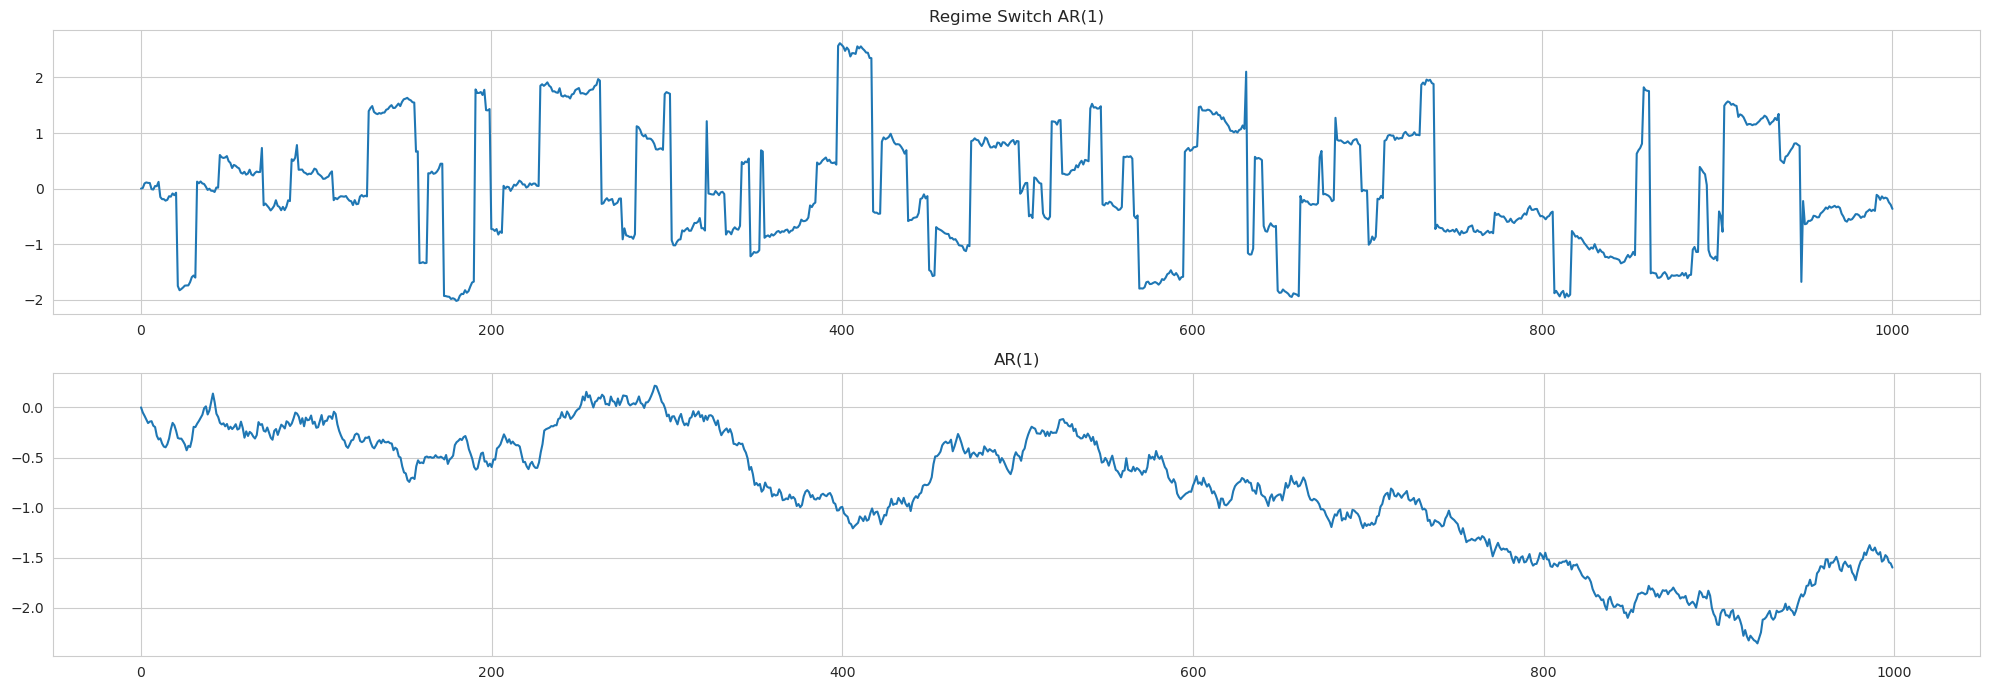

In [50]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 7))

ax[0].plot(xs)
ax[1].plot(ar1.simulate(0, length=1000))

ax[0].set_title('Regime Switch AR(1)')
ax[1].set_title('AR(1)')

fig.tight_layout()
fig.show()